# SCALE.AI Take-Home Challenge
## Submission by Adrian Lievano 

Chicago Bike Sharing:

When trying to determine the effect of a change, we often have to first account for greater sources of variation in the data, by developing a baseline model and using it to control for variables that obscure the underlying pattern.

This exercise involves a public dataset from Kaggle:  https://www.kaggle.com/yingwurenjian/chicago-divvy-bicycle-sharing-data describing rides in a bike share program in Chicago over many years.

Determine the effect of temperature on bike trip counts and lengths, controlling for any relevant seasonality (at the most relevant timescales - use your judgement!) and customer segments. Make your case with the appropriate visualizations.

If you find the amount of data overwhelming, sampling ~100k rows randomly should give you good results.

Structure your efforts into two stages - an exploration stage where you identify the important variables with significant interactions, and a synthesis stage where you pick one or two patterns to organize your findings around.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [ ]:
df = pd.read_csv('chicago-divvy-bicycle-sharing-data/data.csv')

## Part 1: Determine the effect of temperature on bike trip counts and lengths (control for seasonality), and segments. 
#### Identify the most important variables with significant interactions
#### Synthesis (discussion)


## Step 1: Data Exploration

1. Define objective
2. Determine data types (feature variables)
3. Data Exploration & Visualization
4. Data Preprocessing (if needed)


#### Step 1: Objective

Our goal is to determine the effect of temperature on:

(1) bike trip counts
(2) length, otherwise known as total duration. 

In a typical data science problem, I would first read some background information on cycling patterns and get a better understanding of the domain from where the data comes from. In this take-home challenge, where there is limited time, I will skip this step and focus on answering the problem statement. 

Our intuition says that higher temperatures will lead to decrease trip counts and length. But, we'll see what the data tells us. 


## Step 2: Understand feature variables of the imported dataset

In [25]:
df.columns

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')

In [26]:
df.shape

(9495235, 23)

In [27]:
sample_size = 100000
df_sample =df.sample(sample_size, replace = False)

In [28]:
df_sample.shape

(100000, 23)

In [29]:
df_sample.describe()

trip_id           year          month           week  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   9.868880e+06    2015.740670       7.147300      29.312150   
std    4.686351e+06       1.076155       2.712356      11.800935   
min    1.110012e+06    2014.000000       1.000000       1.000000   
25%    5.936378e+06    2015.000000       5.000000      21.000000   
50%    1.005946e+07    2016.000000       7.000000      30.000000   
75%    1.386028e+07    2017.000000       9.000000      38.000000   
max    1.753646e+07    2017.000000      12.000000      53.000000   

                 day           hour   tripduration    temperature  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        2.684220      13.620410      11.419875      62.992637   
std         1.887601       4.874027       7.208549      17.203651   
min         0.000000       0.000000       2.000000      -9.900000   
25%         1.000000       9.000000       6.000000      52.000000   
50%         3.000000      15.000000       9.633333      66.900000   
75%         4.000000      17.000000      15.116667      75.900000   
max         6.000000      23.000000      60.000000      95.000000   

       from_station_id  latitude_start  longitude_start  dpcapacity_start  \
count    100000.000000   100000.000000    100000.000000     100000.000000   
mean        180.033280       41.900132       -87.644649         21.362120   
std         121.407146        0.034728         0.021717          7.639824   
min           2.000000       41.743316       -87.802870          0.000000   
25%          77.000000       41.881032       -87.654787         15.000000   
50%         164.000000       41.892278       -87.641066         19.000000   
75%         268.000000       41.920082       -87.629928         23.000000   
max         625.000000       42.064313       -87.549386         55.000000   

       to_station_id   latitude_end  longitude_end  dpcapacity_end  
count  100000.000000  100000.000000  100000.000000   100000.000000  
mean      180.372130      41.900593     -87.644931       21.292400  
std       121.931815       0.034976       0.021782        7.626398  
min         2.000000      41.736646     -87.802870        0.000000  
25%        77.000000      41.881032     -87.655486       15.000000  
50%       165.000000      41.893843     -87.641088       19.000000  
75%       268.000000      41.921687     -87.629928       23.000000  
max       625.000000      42.064313     -87.549386       55.000000

In [38]:
df_sample.head(8)

trip_id  year  month  week  day  hour    usertype  gender  \
1844039   5824646  2015      6    26    2    19  Subscriber    Male   
303258    1672571  2014      5    20    2    12  Subscriber    Male   
1277284   4383425  2014     12    51    5    22  Subscriber    Male   
2751735   7109873  2015      8    35    1    12  Subscriber    Male   
8214057  16024900  2017      8    34    3    19  Subscriber    Male   
5581674  11127671  2016      8    31    3    17  Subscriber  Female   
2497922   6373266  2015      7    30    1     9  Subscriber    Male   
8309762  15868204  2017      8    33    3    17  Subscriber  Female   

                   starttime             stoptime      ...        \
1844039  2015-06-24 19:46:00  2015-06-24 19:52:00      ...         
303258   2014-05-14 12:56:00  2014-05-14 13:02:00      ...         
1277284  2014-12-20 22:09:00  2014-12-20 22:15:00      ...         
2751735  2015-08-25 12:26:00  2015-08-25 12:30:00      ...         
8214057  2017-08-24 19:28:20  2017-08-24 19:32:08      ...         
5581674  2016-08-04 17:22:21  2016-08-04 17:32:41      ...         
2497922  2015-07-21 09:16:00  2015-07-21 09:27:00      ...         
8309762  2017-08-17 17:15:51  2017-08-17 17:30:18      ...         

         from_station_id                    from_station_name latitude_start  \
1844039               73             Jefferson St & Monroe St      41.880422   
303258               174                Canal St & Madison St      41.882091   
1277284              100  Orleans St & Merchandise Mart Plaza      41.888243   
2751735               31            Franklin St & Chicago Ave      41.896802   
8214057              504         Campbell Ave & Fullerton Ave      41.924632   
5581674              220           Hampden Ct & Diversey Pkwy      41.932620   
2497922              138           Clybourn Ave & Division St      41.904509   
8309762              149                Calumet Ave & 33rd St      41.834900   

         longitude_start dpcapacity_start  to_station_id  \
1844039       -87.642746             19.0             56   
303258        -87.639833             23.0            181   
1277284       -87.636390             23.0            192   
2751735       -87.635638             23.0            110   
8214057       -87.689307             15.0            258   
5581674       -87.642385             23.0            289   
2497922       -87.640500             15.0             29   
8309762       -87.617930             11.0            200   

                   to_station_name  latitude_end  longitude_end dpcapacity_end  
1844039  Desplaines St & Kinzie St     41.888716     -87.644448           27.0  
303258    LaSalle St & Illinois St     41.890749     -87.632060           31.0  
1277284        Canal St & Adams St     41.879255     -87.639904           27.0  
2751735      Dearborn St & Erie St     41.893992     -87.629318           23.0  
8214057    Logan Blvd & Elston Ave     41.930584     -87.685126           19.0  
5581674      Wells St & Concord Ln     41.912133     -87.634656           19.0  
2497922   Noble St & Milwaukee Ave     41.900680     -87.662600           15.0  
8309762        MLK Jr Dr & 47th St     41.809851     -87.616279           11.0  

[8 rows x 23 columns]

In [31]:
df_sample['trip_id'].nunique()

100000

Note: We wanted to make sure there were a unique number of trips. We run the command above to confirm this.

In [47]:
df_sample['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

Note: This might be a good segment to filter our results on so that we understand the difference between these users. 
usertype"Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership

In [49]:
df_sample['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [50]:
df_sample['events'].unique()

array(['cloudy', 'rain or snow', 'clear', 'not clear', 'tstorms',
       'unknown'], dtype=object)

In [64]:
df_sample.groupby('events')['trip_id'].count().sort_values(ascending = False)

events
cloudy          88556
clear            5335
rain or snow     4508
not clear         920
tstorms           674
unknown             7
Name: trip_id, dtype: int64

Note: This is another categorical variable that will serve to help us better understand how these weather conditions, in addition to temperature, influence total trip count and duration.

(1) 88% of the sample shows weather that is cloudy. 5.3% clear, 4.5% rain/snow, and around 1.6% for other or not clear.

df_sample['to_station_name'].unique()

In [55]:
df_sample['dpcapacity_end'].describe()

count    100000.000000
mean         21.292400
std           7.626398
min           0.000000
25%          15.000000
50%          19.000000
75%          23.000000
max          55.000000
Name: dpcapacity_end, dtype: float64

We are going to place less of an emphasis on these feature variables:
    1. 'from_station_id', 
    2. 'from_station_name', 
    3. 'latitude_start',
    4. 'longitude_start', 
    5. 'dpcapacity_start', 
    6. 'to_station_id',
    7. 'to_station_name', 
    8. 'latitude_end', 
    9. 'longitude_end', 
    10. 'dpcapacity_end']

#### Temperature is the Independent Variable of Interest

In [32]:
df_sample['temperature'].describe()

count    100000.000000
mean         62.992637
std          17.203651
min          -9.900000
25%          52.000000
50%          66.900000
75%          75.900000
max          95.000000
Name: temperature, dtype: float64

In aggregate, the average temperature across all time periods, weather conditions, users, etc., is 63 degrees Farenheit. Our hottest day was 95 degrees F. Our coldest day was -9.9 degrees F, someone was biking when it was freezing outside!

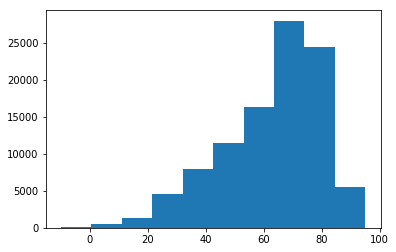

In [33]:
plt.hist(df_sample['temperature'])
plt.show()

#### Trip Duration is one of our dependent variables of interest

In [34]:
df_sample['tripduration'].describe()

count    100000.000000
mean         11.419875
std           7.208549
min           2.000000
25%           6.000000
50%           9.633333
75%          15.116667
max          60.000000
Name: tripduration, dtype: float64

In aggregate, the average trip time across all time periods, weather conditions, users, etc., is 11.4 minutes. Our standard deviation is 7.2 minutes, and our 3rd interquartile range of trips is at 15 minutes. If we wanted to build a prediction algorithm and we wanted to remove outliers, this would be a good upper threshold to consider.

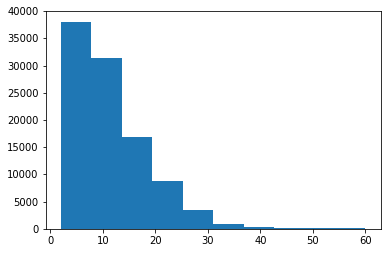

In [35]:
plt.hist(df_sample['tripduration'])
plt.show()

In [ ]:
### Visualization - Date vs. Total Duration of Trip w/ Temperature Over Time as Second Axis (grouped by week)

In [65]:
import plotly.express as px

In [85]:
df_sample_gweek = df_sample.groupby('week')[['week','trip_id', 'usertype', 'gender', 'events','temperature', 'tripduration']]

In [90]:
df_sample_ghour = df_sample.groupby('hour')[['hour','trip_id', 'usertype', 'gender', 'events','temperature', 'tripduration']]


In [91]:
df_sample_gyear = df_sample.groupby('year')[['year','trip_id', 'usertype', 'gender', 'events','temperature', 'tripduration']]


Note: One way to understand the data is to group results by different time variables, so that we don't produce a massive scatter plot

In [45]:
fig = px.scatter(df_sample, x='temperature', y='tripduration')
fig.show()

In [ ]:
### Visualization - Date vs. Total Number of Trips w/ Temperature Over Time as Second Axis (grouped by week)